# K-Means Clustering of Credit Card Dataset

Prints many statements at same time using the below command

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# Importing the required Libraries

In [2]:
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics
import pandas as pd


In [3]:
from sklearn.preprocessing import MinMaxScaler
import graphviz

# Reading the CSV file from the machine

In [4]:
df= pd.read_excel("D:\Module3_RP\Session1\Credit.xlsx", sep=',')

In [5]:
df.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
df.shape

(400, 11)

# Seperating the Categorical Variables and Numerical Variables.

In [7]:
num = df.iloc[:,[0,1,2,3,4,5,10]]
cat = df.iloc[:,6:10]
num.head()
cat.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


,Gender,Student,Married,Ethnicity
0,Male,No,Yes,Caucasian
1,Female,Yes,Yes,Asian
2,Male,No,No,Asian
3,Female,No,No,Asian
4,Male,No,Yes,Caucasian


# EDA report using Pandas Profiling

In [8]:
eda_report = pandas_profiling.ProfileReport(df)


In [9]:
eda_report.to_file("Credit_EDA.html")

# Dummy Coding


Assigning numerical codes to the categorical data; below code looks for the column with OBJECT datatype, and assign the codes

In [10]:
dummy_df = pd.get_dummies(cat)
dummy_df.head()

,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,1,0,1,0
2,0,1,1,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,1


# Standardization

Scaling all the numerical values  between 0 to 1 using MinMaxScaler. This brings all the data with different dimensions to common format.

In [11]:
#scale all values between0 and 1
scld=MinMaxScaler(feature_range=(0,1))

In [12]:
arr_scld=scld.fit_transform(num)

C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
arr_scld

array([[0.02573746, 0.21067545, 0.21372328, ..., 0.14666667, 0.4       ,
        0.16658329],
       [0.54272181, 0.44340634, 0.43869516, ..., 0.78666667, 0.66666667,
        0.45172586],
       [0.53459837, 0.47633635, 0.4735658 , ..., 0.64      , 0.4       ,
        0.29014507],
       ...,
       [0.26955979, 0.25394394, 0.25646794, ..., 0.58666667, 0.46666667,
        0.06903452],
       [0.15528704, 0.12789095, 0.11136108, ..., 0.28      , 0.53333333,
        0.        ],
       [0.04735081, 0.35755858, 0.36220472, ..., 0.54666667, 0.13333333,
        0.48324162]])

In [14]:

num_scld=pd.DataFrame(arr_scld,columns=num.columns)
num_scld.head()
num_scld.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.166583
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.451726
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.290145
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.482241
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.165583


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.197781,0.297182,0.294646,0.244688,0.435567,0.563333,0.260138
std,0.199933,0.176765,0.174043,0.171409,0.229997,0.208347,0.229994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060434,0.171006,0.173510,0.125000,0.250000,0.400000,0.034392
50%,0.129121,0.288520,0.282340,0.250000,0.440000,0.600000,0.229865
75%,0.267284,0.384266,0.387233,0.375000,0.626667,0.733333,0.431716
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Combining both Dummy coded Categorical and Scaled Numerical values into single Dataframe

In [15]:
df_final = pd.concat([num_scld,dummy_df], axis=1)
df_final.head()
df_final.shape

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.166583,0,1,1,0,0,1,0,0,1
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.451726,1,0,0,1,0,1,0,1,0
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.290145,0,1,1,0,1,0,0,1,0
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.482241,1,0,1,0,1,0,0,1,0
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.165583,0,1,1,0,0,1,0,0,1


(400, 16)

# Buiding Clusters

Finding the Optimal Number of Cluster with least error.

In [16]:
#lets build clusters
from sklearn.cluster import KMeans
num_of_clusters= range(2,10)
error=[]

for num_clusters in num_of_clusters:
    cluster=KMeans(num_clusters)
    cluster.fit(df_final)
    error.append(cluster.inertia_/100)
    
df1=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})
df1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_Numbers,Error_Term
0,2,6.237764
1,3,5.084296
2,4,4.301357
3,5,3.803435
4,6,3.458293
5,7,3.042081
6,8,2.744393
7,9,2.451804


Above Table displays, what is the Error term when No. of Cluster is =2,3,4.... so on. We can see that minimum ErrorTerm  with least No. of Clusters is 4 CLUSTERS WITH ERROR TERM=4.301

# Elbow Method to find Optimal Number of Clusters

<Figure size 1500x1000 with 0 Axes>

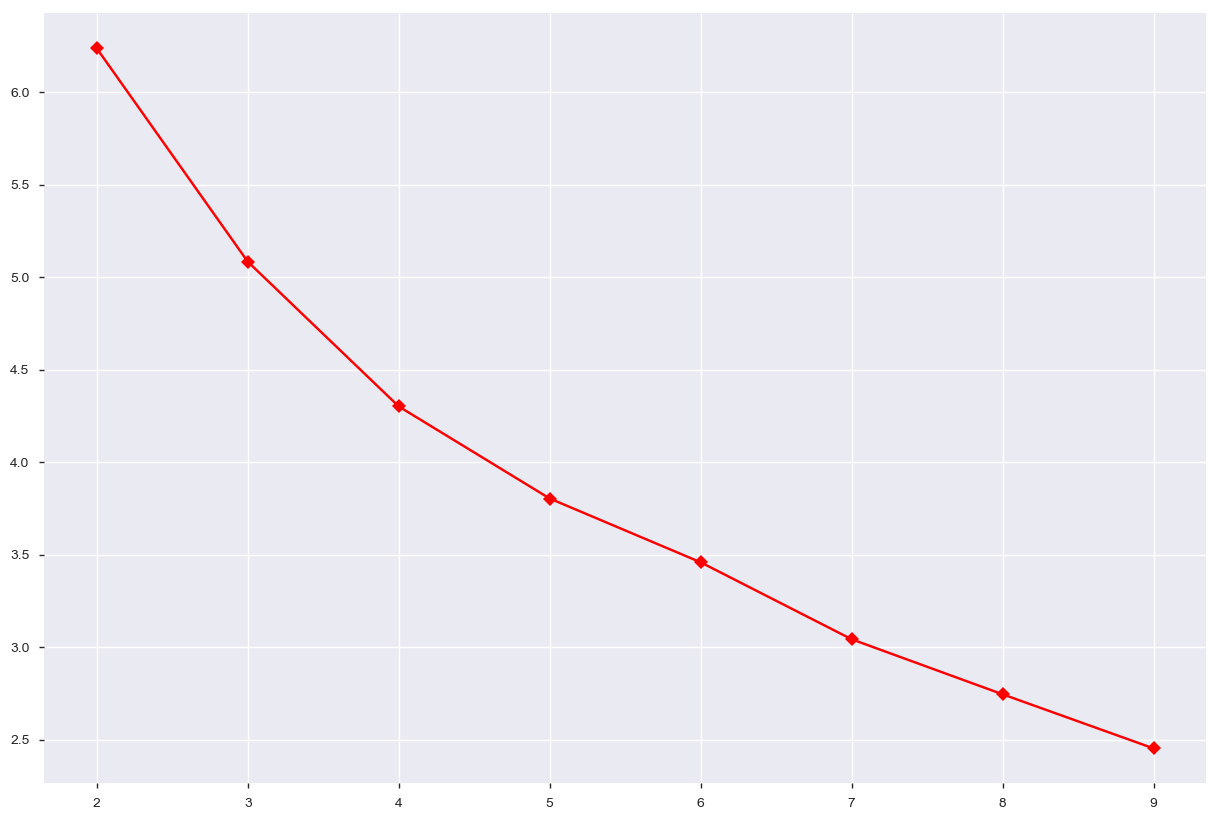

In [17]:
#Find out the right number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df1.Cluster_Numbers,df1.Error_Term,marker="D",color='red')
plt.xlabel=('Number of Clusters')
plt.ylabel=('SSE')
plt.title=('Find the optimal number of clusters')
plt.show()

This graph is plot of Error term against no. of clusters. Here the very FIRST BEND in the curve siginifies the Optimal Number of Clusters. From the above plot, we can see it is 4

# Buidling 4 Clusters

This built on the scaled values

In [18]:
# Build with 4 Clusters
cluster=KMeans(4)

In [19]:
cluster.fit(df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:

cluster.labels_

array([2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 2, 0, 1, 2, 3, 1, 1, 1, 1, 0, 3, 3,
       2, 2, 3, 1, 3, 0, 1, 3, 1, 2, 3, 2, 1, 3, 1, 1, 3, 2, 3, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 3, 3, 3, 0, 1, 1,
       1, 3, 1, 2, 2, 1, 1, 0, 1, 2, 0, 3, 1, 0, 1, 0, 0, 3, 0, 1, 2, 3,
       2, 3, 2, 2, 0, 0, 3, 1, 0, 1, 3, 0, 0, 3, 0, 0, 3, 1, 2, 0, 2, 2,
       1, 3, 2, 1, 0, 3, 3, 2, 3, 0, 1, 2, 3, 3, 1, 1, 1, 3, 0, 2, 1, 2,
       2, 1, 1, 3, 3, 2, 1, 0, 1, 2, 0, 3, 2, 0, 1, 2, 1, 2, 1, 1, 3, 0,
       2, 1, 1, 1, 1, 0, 3, 2, 2, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0,
       2, 1, 3, 3, 2, 2, 1, 1, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 2, 1, 2, 3,
       1, 2, 2, 1, 1, 3, 3, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 3,
       3, 3, 0, 2, 2, 1, 3, 1, 3, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 3, 1, 3, 0, 2, 1, 1, 2, 3, 2, 1, 0, 3, 2, 2, 3, 2, 1, 1, 3,
       2, 1, 1, 1, 0, 1, 0, 3, 3, 0, 3, 2, 3, 2, 1, 3, 3, 3, 1, 1, 2, 1,
       3, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2,

In [21]:
df_final['cluster']=cluster.labels_

In [22]:
df_final.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,cluster
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.166583,0,1,1,0,0,1,0,0,1,2
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.451726,1,0,0,1,0,1,0,1,0,1
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.290145,0,1,1,0,1,0,0,1,0,0
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.482241,1,0,1,0,1,0,0,1,0,3
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.165583,0,1,1,0,0,1,0,0,1,2


In [23]:
df_final.tail()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,cluster
395,0.009882,0.248507,0.240720,0.25,0.120000,0.533333,0.280140,0,1,1,0,0,1,0,0,1,2
396,0.017075,0.228442,0.228346,0.50,0.560000,0.800000,0.240120,0,1,1,0,1,0,1,0,0,0
397,0.269560,0.253944,0.256468,0.50,0.586667,0.466667,0.069035,1,0,1,0,0,1,0,0,1,1
398,0.155287,0.127891,0.111361,0.00,0.280000,0.533333,0.000000,0,1,1,0,0,1,0,0,1,2
399,0.047351,0.357559,0.362205,0.50,0.546667,0.133333,0.483242,1,0,1,0,1,0,0,1,0,3


In [24]:
df_final.shape

(400, 17)

# Creating the Cluster Profile for Numerical data

In [25]:
clust_profile=pd.pivot_table(df_final,values=['Income','Limit','Rating','Cards','Age','Education','Balance',],
                                        index='cluster',aggfunc=np.mean)

In [26]:
clust_profile

,Age,Balance,Cards,Education,Income,Limit,Rating
cluster,,,,,,,
0,0.455088,0.277856,0.233553,0.578947,0.203258,0.303859,0.298606
1,0.423021,0.276376,0.229492,0.586458,0.208524,0.312111,0.309134
2,0.421311,0.240201,0.258547,0.554986,0.197886,0.290011,0.289435
3,0.458228,0.246307,0.259494,0.523207,0.174951,0.277191,0.275078


In [27]:
Roundff_clust_profile=np.round(clust_profile,2)
Roundff_clust_profile

,Age,Balance,Cards,Education,Income,Limit,Rating
cluster,,,,,,,
0,0.46,0.28,0.23,0.58,0.20,0.30,0.30
1,0.42,0.28,0.23,0.59,0.21,0.31,0.31
2,0.42,0.24,0.26,0.55,0.20,0.29,0.29
3,0.46,0.25,0.26,0.52,0.17,0.28,0.28


Cluster 1 has the least income customer.

with respect to Balance,Cards,Education,Limit and Rating; the Cluster 0 & 1  and Cluster 2 & 3 has similar kind of cutomers  

# Creating the Cluster Profile for Categorical data

In [30]:
clust_profile_cat=pd.pivot_table(df_final,values=['Gender_Female','Gender_Male','Student_No','Student_Yes','Married_No','Married_Yes','Ethnicity_African American','Ethnicity_Asian','Ethnicity_Caucasian'],
                                        index='cluster')

In [31]:
clust_profile_cat

,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Gender_Male,Married_No,Married_Yes,Student_No,Student_Yes
cluster,,,,,,,,,
0,0.263158,0.250000,0.486842,0,1,1,0,0.881579,0.118421
1,0.179688,0.328125,0.492188,1,0,0,1,0.898438,0.101562
2,0.247863,0.239316,0.512821,0,1,0,1,0.940171,0.059829
3,0.341772,0.164557,0.493671,1,0,1,0,0.860759,0.139241


Cluster 0 : 24.78 % of African American, 23.9% of Asian, 51% of Caucasian; Married Men; 94% of students

Cluster 1 : 34.11% of African American, 16.45% of Asian, 49% of Caucasian; Married WoMen; 86.07% of students

Cluster 2 : 17.96 % of African American, 32.81% of Asian, 49.21% of Caucasian; Single WoMen; 89.84% of students

Cluster 3 : 26.31 % of African American, 25% of Asian, 48.68% of Caucasian; Single Men; 88.15% of students

In [ ]:
df_final.groupby("cluster").size()

The above tables shows the numver of people in each of the Cluster

Cluster 0 and 2 has most number of customers.